<a href="https://colab.research.google.com/github/donlap/stat424/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Equinox Documentation](https://docs.kidger.site/equinox/)

In [1]:
!pip install -q equinox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.1 MB/s eta 0:00:00


In [2]:
import equinox as eqx
import optax
import jax
import jax.numpy as jnp
from jax import random
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [3]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and add channel dimension
X_train = X_train.astype('float32') / 255.0
X_train = X_train[..., jnp.newaxis]  # Add channel: (60000, 28, 28, 1)

# Use subset
X_train = X_train[:5000]
y_train = y_train[:5000]

print(f"Training data: {X_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (5000, 28, 28, 1)


### Visualize data

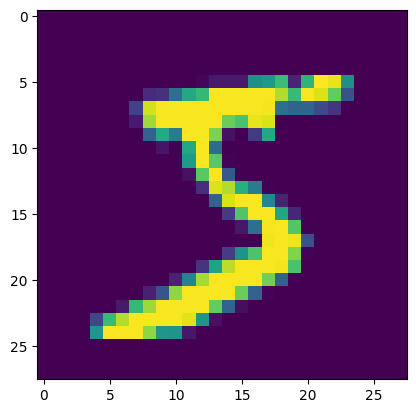

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

np.uint8(5)

### Build a model

[Convolutional layer in Equinox](https://docs.kidger.site/equinox/api/nn/conv/)

In [ ]:
class SimpleCNN(eqx.Module):
  conv1: eqx.nn.Conv2d
  conv2: eqx.nn.Conv2d
  pool: eqx.nn.MaxPool2d
  lin1 : eqx.nn.Linear
  lin2: eqx.nn.Linear

  def __init__(self, key):
    key1, key2, key3, key4 = random.split(key, 4)
    self.conv1 = eqx.nn.Conv2d(1, 32, kernel_size=3, key=key1)
    self.conv2 = eqx.nn.Conv2d(32, 64, kernel_size=3, key=key2)
    self.pool = eqx.nn.MaxPool2d(kernel_size=2, stride=2)
    self.lin1 = eqx.nn.Linear(64 * 5 * 5, 128, key=key3)
    self.lin2 = eqx.nn.Linear(128, 10, key=key4)


### Loss function

### Make one training (gradient descent) step

### Training

[Optimizer list](https://optax.readthedocs.io/en/latest/api/optimizers.html)

### Visualize predictions

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    pred = jnp.argmax(model(X_train[i]))
    ax.imshow(X_train[i].squeeze(), cmap='gray')
    ax.set_title(f"Predicted: {pred}")
    ax.axis('off')
plt.show()